In [1]:
import pandas as pd
import os

df = pd.read_csv(os.path.join("results", 'results.csv'), index_col=0)
df.shape

(81, 9)

In [19]:
df2 = pd.read_csv(os.path.join("results", 'results_local2.csv'), index_col=0)

df2["total score"] = df2["accuracy"] + df2["completeness"] + df2["fluency"] + df2["conciseness"]

df2["total score (no conciseness)"] = df2["accuracy"] + df2["completeness"] + df2["fluency"]
df2_summary = df2[["accuracy", "completeness", "fluency", "conciseness", "total score", "total score (no conciseness)"]].describe()

df2_summary

,accuracy,completeness,fluency,conciseness,total score,total score (no conciseness)
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.977778,1.644444,3.911111,3.813674,10.347007,6.533333
std,1.313181,1.207385,0.105409,0.121423,2.307967,2.262742
min,0.000000,0.000000,3.800000,3.626667,7.626667,4.000000
25%,0.000000,0.400000,3.800000,3.707937,8.208187,4.400000
50%,0.000000,2.000000,4.000000,3.822222,9.711111,6.000000
75%,2.400000,2.400000,4.000000,3.911111,11.907937,8.200000
max,3.200000,3.200000,4.000000,4.000000,14.022222,10.200000


In [2]:
df.head()

,dataset,prompt,total score,accuracy,completeness,fluency,conciseness,n_few_shot,n_bootstrapped_few_shot
0,housing_1.json,You are helping users understand an ML model's...,15.24,3.52,3.92,3.80,3.670588,1.0,NaN
1,housing_1.json,You are helping users understand an ML model's...,14.96,3.20,3.92,3.84,3.696732,3.0,NaN
2,housing_1.json,You are helping users understand an ML model's...,14.92,3.36,3.92,3.64,3.605229,3.0,3.0
3,housing_1.json,You are helping users understand an ML model's...,15.24,3.52,4.00,3.72,3.681046,5.0,NaN
4,housing_2.json,You are helping users understand an ML model's...,16.00,4.00,4.00,4.00,3.662222,1.0,NaN


In [3]:
df["total score"] = df["accuracy"] + df["completeness"] + df["fluency"] + df["conciseness"]

df["total score (no conciseness)"] = df["accuracy"] + df["completeness"] + df["fluency"]

In [4]:
dataset_names = {"housing_1.json": "House 1",
                 "housing_2.json": "House 2",
                 "housing_3.json": "House 3",
                 "mushroom_1.json": "Mush 1",
                 "mushroom_2.json": "Mush 2",
                 "student_1.json": "Student 1",
                 "student_2.json": "Student 2",
                 "pdf_1.json": "PDF 1",
                 "pdf_2.json": "PDF 2"}

df['dataset'] = df['dataset'].map(dataset_names)

In [5]:
prompts_to_ids = {df['prompt'].unique()[0]: "Prompt 1", 
                  df['prompt'].unique()[1]: "Prompt 2",
                  df['prompt'].unique()[2]: "Prompt 3"}

df['prompt'] = df['prompt'].map(prompts_to_ids)

In [6]:
df["n_few_shot"].fillna(0, inplace=True)
df["n_bootstrapped_few_shot"].fillna(0, inplace=True)

df["n_few_shot"] = df["n_few_shot"].astype(int)
df["n_bootstrapped_few_shot"] = df["n_bootstrapped_few_shot"].astype(int)

df["n_few_shot"].fillna(0, inplace=True)
df["n_bootstrapped_few_shot"].fillna(0, inplace=True)
df.head()

,dataset,prompt,total score,accuracy,completeness,fluency,conciseness,n_few_shot,n_bootstrapped_few_shot,total score (no conciseness)
0,House 1,Prompt 1,14.910588,3.52,3.92,3.80,3.670588,1,0,11.24
1,House 1,Prompt 1,14.656732,3.20,3.92,3.84,3.696732,3,0,10.96
2,House 1,Prompt 1,14.525229,3.36,3.92,3.64,3.605229,3,3,10.92
3,House 1,Prompt 1,14.921046,3.52,4.00,3.72,3.681046,5,0,11.24
4,House 2,Prompt 1,15.662222,4.00,4.00,4.00,3.662222,1,0,12.00


In [7]:
column_names = {"dataset": "Dataset",
                "prompt": "Prompt",
                "n_few_shot": "$L$",
                "n_bootstrapped_few_shot": "$B$",
                "accuracy": "Accuracy",
                "completeness": "Completeness",
                "fluency": "Fluency",
                "conciseness": "Conciseness",
                "total score": "Total score",
                "total score (no conciseness)": "Total score (w/out conciseness)"}

df = df.rename(columns=column_names)
df = df[["Dataset", "Prompt", "$L$", "$B$", "Accuracy", "Completeness", "Fluency", "Conciseness", "Total score", "Total score (w/out conciseness)"]]

# round all scores to 3 decimal places
df = df.round(3)

df.to_csv(os.path.join("results", "cleaned_results.csv"))

df.head()

,Dataset,Prompt,$L$,$B$,Accuracy,Completeness,Fluency,Conciseness,Total score,Total score (w/out conciseness)
0,House 1,Prompt 1,1,0,3.52,3.92,3.80,3.671,14.911,11.24
1,House 1,Prompt 1,3,0,3.20,3.92,3.84,3.697,14.657,10.96
2,House 1,Prompt 1,3,3,3.36,3.92,3.64,3.605,14.525,10.92
3,House 1,Prompt 1,5,0,3.52,4.00,3.72,3.681,14.921,11.24
4,House 2,Prompt 1,1,0,4.00,4.00,4.00,3.662,15.662,12.00


In [8]:
df_by_technique = df.groupby(["Prompt", "$L$", "$B$"]).agg(
    {"Accuracy": "mean", 
     "Completeness": "mean", 
     "Fluency": "mean", 
     "Conciseness": "mean", 
     "Total score": "mean", 
     "Total score (w/out conciseness)": "mean"
}).reset_index()

df_by_technique = df_by_technique.round(3)

df_by_technique.to_csv(os.path.join("results", "results_by_technique.csv"))
df_by_technique.to_latex(buf=os.path.join("results", "results_by_technique.tex"), index=False, float_format="%.3f", caption="Overall results for each prompt and few-shot setting.")

df_by_technique.head()

,Prompt,$L$,$B$,Accuracy,Completeness,Fluency,Conciseness,Total score,Total score (w/out conciseness)
0,Prompt 1,0,0,3.911,4.000,2.266,0.850,11.028,10.177
1,Prompt 1,0,1,3.782,3.944,2.450,0.742,10.919,10.177
2,Prompt 1,0,3,3.800,3.936,2.477,0.742,10.954,10.212
3,Prompt 1,1,0,3.169,3.384,3.796,3.749,14.098,10.349
4,Prompt 1,3,0,3.156,3.428,3.751,3.746,14.080,10.334


In [9]:
# BY TECHNIQUE WITH STD DEV

# Group by the specified columns and calculate both mean and standard deviation
df_by_technique_mean = df.groupby(["Prompt", "$L$", "$B$"]).agg({
    "Accuracy": "mean", 
    "Completeness": "mean", 
    "Fluency": "mean", 
    "Conciseness": "mean", 
    "Total score": "mean",
    "Total score (w/out conciseness)": "mean"
}).reset_index()

df_by_technique_std = df.groupby(["Prompt", "$L$", "$B$"]).agg({
    "Accuracy": "std", 
    "Completeness": "std", 
    "Fluency": "std", 
    "Conciseness": "std", 
    "Total score": "std",
     "Total score (w/out conciseness)": "std"
}).reset_index()

# Combine mean and standard deviation into the desired format: mean (std)
for column in ["Accuracy", "Completeness", "Fluency", "Conciseness", "Total score", "Total score (w/out conciseness)"]:
    df_by_technique_mean[column] = df_by_technique_mean[column].apply(lambda x: f"{x:.3f}") + " (" + df_by_technique_std[column].apply(lambda x: f"{x:.2f}") + ")"

# Save to CSV and LaTeX
df_by_technique_mean.to_csv(os.path.join("results", "results_by_technique.csv"), index=False)
df_by_technique_mean.to_latex(
    buf=os.path.join("results", "results_by_technique.tex"), 
    index=False, 
    escape=False,  # escape=False allows LaTeX formatting (like parentheses) to be preserved
    caption="Overall results for each prompt and few-shot setting."
)

In [10]:
df_by_technique_mean.head()
df_by_dataset = df.groupby(["Dataset"]).agg(
    {"Accuracy": "mean", 
     "Completeness": "mean", 
     "Fluency": "mean", 
     "Conciseness": "mean", 
     "Total score": "mean",
     "Total score (w/out conciseness)": "mean"
}).reset_index()

df_by_dataset = df_by_dataset.round(3)

df_by_dataset.to_csv(os.path.join("results", "results_by_dataset.csv"))
df_by_dataset.to_latex(buf=os.path.join("results", "results_by_dataset.tex"), index=False, float_format="%.3f", caption="Overall results for each prompt and few-shot setting.")

df_by_dataset.head()

,Dataset,Accuracy,Completeness,Fluency,Conciseness,Total score,Total score (w/out conciseness)
0,House 1,3.253,3.911,2.956,2.946,13.066,10.120
1,House 2,3.963,4.000,3.324,1.932,13.219,11.287
2,House 3,3.963,3.944,3.083,1.711,12.702,10.991
3,Mush 1,3.533,3.889,2.394,2.490,12.307,9.817
4,Mush 2,3.267,3.556,2.489,1.939,11.251,9.311


In [11]:
# BY DATASET WITH STD DEV

# Group by the specified columns and calculate both mean and standard deviation
df_by_dataset_mean = df.groupby(["Dataset"]).agg({
    "Accuracy": "mean", 
    "Completeness": "mean", 
    "Fluency": "mean", 
    "Conciseness": "mean", 
    "Total score": "mean",
    "Total score (w/out conciseness)": "mean"
}).reset_index()

df_by_dataset_std = df.groupby(["Dataset"]).agg({
    "Accuracy": "std", 
    "Completeness": "std", 
    "Fluency": "std", 
    "Conciseness": "std", 
    "Total score": "std",
    "Total score (w/out conciseness)": "std"
}).reset_index()

# Combine mean and standard deviation into the desired format: mean (std)
for column in ["Accuracy", "Completeness", "Fluency", "Conciseness", "Total score", "Total score (w/out conciseness)"]:
    df_by_dataset_mean[column] = df_by_dataset_mean[column].apply(lambda x: f"{x:.3f}") + " (" + df_by_dataset_std[column].apply(lambda x: f"{x:.2f}") + ")"

# Save to CSV and LaTeX
df_by_dataset_mean.to_csv(os.path.join("results", "results_by_dataset.csv"), index=False)
df_by_dataset_mean.to_latex(
    buf=os.path.join("results", "results_by_dataset.tex"), 
    index=False, 
    escape=False,  # escape=False allows LaTeX formatting (like parentheses) to be preserved
    caption="Overall results for each prompt and few-shot setting."
)

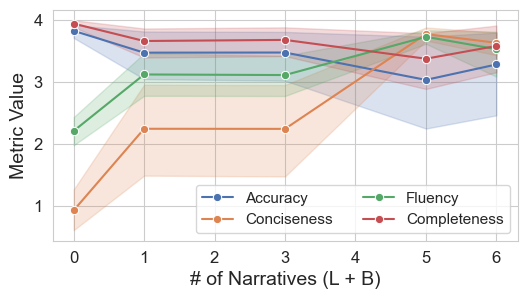

In [12]:
# plot number of L+B in df_by_technique versus each metrics
import matplotlib.pyplot as plt
import seaborn as sns

df["# of Narratives"] = df["$L$"] + df["$B$"]

df_melted = df.melt(id_vars=["# of Narratives"], 
                    value_vars=["Accuracy", "Conciseness", "Fluency", "Completeness"],
                    var_name="Metric", 
                    value_name="Value")

# Create the line plot
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 11
})

# Create the line plot with adjusted figure size
plt.figure(figsize=(6, 3))

sns.lineplot(data=df_melted, x="# of Narratives", y="Value", hue="Metric", marker="o", palette="deep", err_style="band")

plt.legend(title=None, ncol=2)

# Add title and labels
# plt.title("Metric Scores vs # of Narratives")
plt.xlabel("# of Narratives (L + B)")
plt.ylabel("Metric Value")

# Show the plot
plt.savefig(os.path.join("results", "metrics_over_narratives.png"), bbox_inches="tight")
plt.show()